# Visualize

This page shows examples on how to visualize the file system. 

In [1]:
# this is a hidden cell

%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import sys

# small trick to find Path2Insight at the moment
sys.path.append("../")

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
import pandas
import numpy

import path2insight
from path2insight.datasets import load_pride

data = load_pride()

## Example 1 (Simple aggregations)

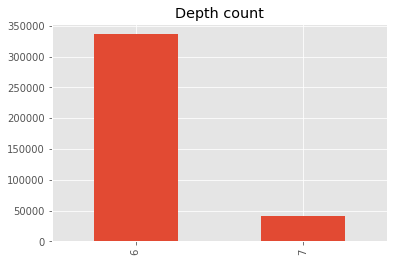

In [4]:
import pandas

data_depth = path2insight.depth_counts(data)
pandas.Series(data_depth).plot.bar(title="Depth count")

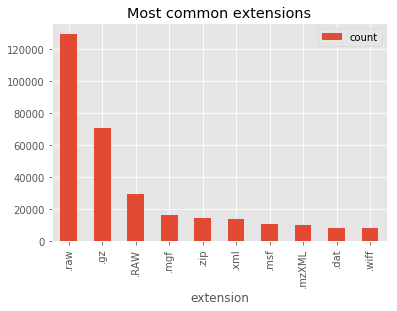

In [5]:
data_top_extensions = path2insight.extension_counts(data).most_common(10)

# convert to dataframe
df_top_extensions = pandas.DataFrame(data_top_extensions, 
                                     columns=['extension', 'count'])
df_top_extensions.set_index('extension', inplace=True)
df_top_extensions.plot.bar(title='Most common extensions')

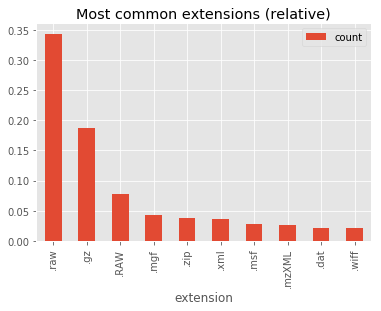

In [6]:
data_top_extensions = path2insight.extension_counts(
    data, normalize=True).most_common(10)

# convert to dataframe
df_top_extensions = pandas.DataFrame(data_top_extensions, 
                                     columns=['extension', 'count'])
df_top_extensions.set_index('extension', inplace=True)
df_top_extensions.plot.bar(title='Most common extensions (relative)')

## Example 2 (Compare projects)

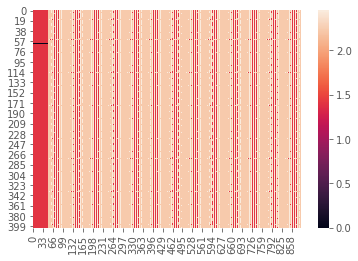

In [7]:
import seaborn as sns

# select the two projects
project_PXD001787 = path2insight.select(data, level5='PXD001787')
project_PXD002010 = path2insight.select(data, level5='PXD002010')

# plot the similarity in tokens
m2 = path2insight.distance_on_extension(project_PXD001787, project_PXD002010)
sns.heatmap(m2, vmin=0)

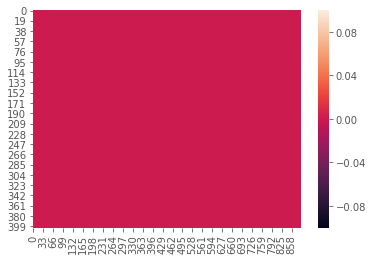

In [8]:
import seaborn as sns

# select the two projects
project_PXD001787 = path2insight.select(data, level5='PXD001787')
project_PXD002010 = path2insight.select(data, level5='PXD002010')

# plot the similarity in tokens
m2 = path2insight.distance_on_depth(project_PXD001787, project_PXD002010)
sns.heatmap(m2, vmin=0)

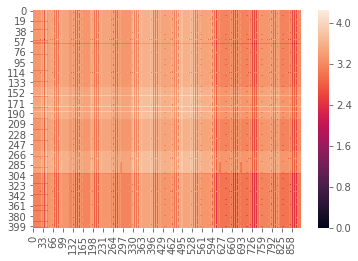

In [9]:
import seaborn as sns

# select the two projects
project_PXD001787 = path2insight.select(data, level5='PXD001787')
project_PXD002010 = path2insight.select(data, level5='PXD002010')

# plot the similarity in tokens
m2 = path2insight.distance_on_token(project_PXD001787, project_PXD002010)
sns.heatmap(m2, vmin=0)

## Example 3 (Clustering)

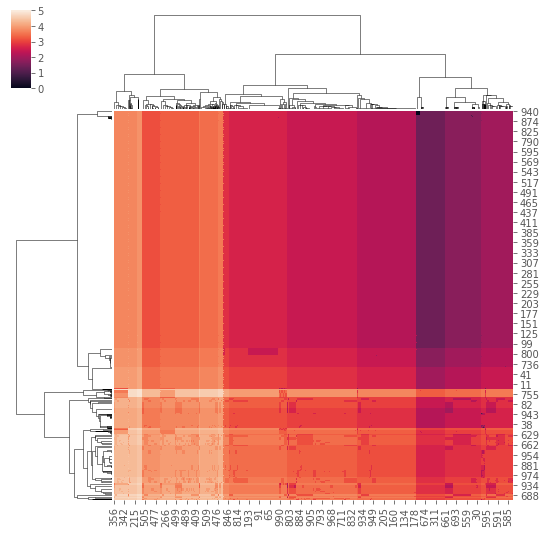

In [10]:
import seaborn as sns

m2 = path2insight.distance_on_token(data[0:1000], data[1000:2000])
sns.clustermap(m2, figsize=(9, 9))